In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso

# Import NumPy, Pandas, Matplotlib, Seaborn libraries, Load the following libraries

In [2]:
import warnings

warnings.filterwarnings('ignore')
# Suppress the warnings

Link to the dataset: Only 2023-2022-2021-2020 was selected

https://data.cso.ie/table/PEA11



In [3]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('PopulationEstimatesDatabase1.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report ('PopulationEstimatesDatabase') and apply the
#pd.read_csv function in order to read the csv file containing the report
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [4]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [5]:
df.info()

# Check the information of the dataframe by applying the .info() function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.1+ KB


In [6]:
df.head(5)

# Print the first 5 rows of the dataframe by applying the.head() function

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [7]:
df.tail(5)

# Print the last 5 rows of the dataframe by applying the .tail() function

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
11812,Population estimates from 1926,2023,98 years,Male,Number,197
11813,Population estimates from 1926,2023,98 years,Female,Number,632
11814,Population estimates from 1926,2023,99 years and over,Both sexes,Number,1600
11815,Population estimates from 1926,2023,99 years and over,Male,Number,352
11816,Population estimates from 1926,2023,99 years and over,Female,Number,1248


In [8]:
df.shape

# Check the number of rows and columns of the new_house dataframe by applying the .shape attribute

(11817, 6)

In [9]:
df.dtypes

# Check the data types of the dataframe by applying the .dtypes attribute to the dataframe

STATISTIC Label       object
Year                   int64
Single Year of Age    object
Sex                   object
UNIT                  object
VALUE                  int64
dtype: object

In [10]:
df.columns

# Check the column names of the dataframe by applying the .columns attribute

Index(['STATISTIC Label', 'Year', 'Single Year of Age', 'Sex', 'UNIT',
       'VALUE'],
      dtype='object')

In [11]:
df.drop(columns=["STATISTIC Label", "UNIT"], inplace=True)

# Apply .drop() to remove the spesific column as it contains the same index values

In [12]:
df.head(5)

,Year,Single Year of Age,Sex,VALUE
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


In [13]:
df = df.rename(columns={'Single Year of Age': 'Single_Year_of_Age','VALUE': 'Value'})

# To correct only the "VALUE" spelling in columns-Rename the columns of the dataframe by applying the .rename() method,
# spaces between words in column names have been replaced by "_" in order to Other columns are suitable.

In [14]:
df.head(5)

,Year,Single_Year_of_Age,Sex,Value
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


In [15]:
df.describe(include = "object")

,Single_Year_of_Age,Sex
count,11817,11817
unique,101,3
top,All ages,Both sexes
freq,117,3939


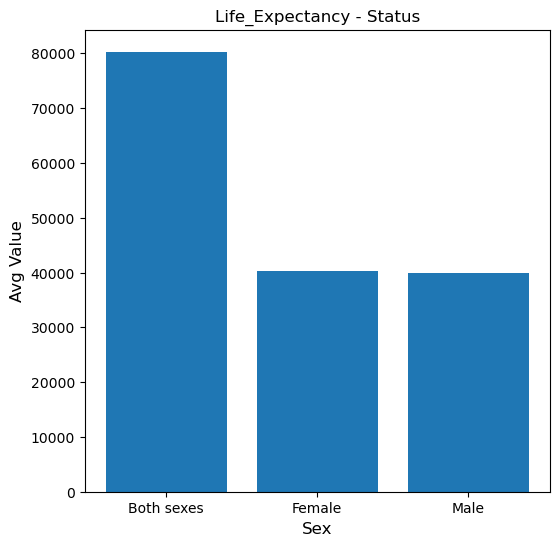

In [16]:
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Sex')['Sex'].count().index,df.groupby('Sex')['Value'].mean())
plt.xlabel("Sex",fontsize=12)
plt.ylabel("Avg Value",fontsize=12)
plt.title("Life_Expectancy - Status")
plt.show()

In [17]:
l_encoder = LabelEncoder()

In [18]:
df["Sex_Encoded"] = l_encoder.fit_transform(df["Sex"])

In [19]:
df["Single_Year_of_Age_Encoded"] = l_encoder.fit_transform(df["Single_Year_of_Age"])

In [20]:
df.head(100)

,Year,Single_Year_of_Age,Sex,Value,Sex_Encoded,Single_Year_of_Age_Encoded
0,1926,All ages,Both sexes,2971992,0,99
1,1926,All ages,Male,1506889,2,99
2,1926,All ages,Female,1465103,1,99
3,1926,Under 1 year,Both sexes,55391,0,100
4,1926,Under 1 year,Male,28084,2,100
...,...,...,...,...,...,...
95,1926,30 years,Female,27357,1,23
96,1926,31 years,Both sexes,28054,0,24
97,1926,31 years,Male,14666,2,24
98,1926,31 years,Female,13388,1,24


In [21]:
df.describe(include = 'O')

,Single_Year_of_Age,Sex
count,11817,11817
unique,101,3
top,All ages,Both sexes
freq,117,3939


In [22]:
df.drop(columns=["Single_Year_of_Age", "Sex"], inplace=True)

In [23]:
df.head(10)

,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
0,1926,2971992,0,99
1,1926,1506889,2,99
2,1926,1465103,1,99
3,1926,55391,0,100
4,1926,28084,2,100
5,1926,27307,1,100
6,1926,55876,0,0
7,1926,28374,2,0
8,1926,27502,1,0
9,1926,58273,0,11


In [24]:
df.shape

(11817, 4)

In [25]:
len(df)

11817

In [26]:
train_validation = df.sample(frac = 0.8, random_state = 200)
test = df.drop(train_validation.index)
len(test)

2363

We allocated 80% of the data as the training and validation set, and the remaining 20% as the test set. I stated what percentage I would divide the amount of “.example” by the accumulation of “frak”. The “random_state” command, like most commands, enables the division of progress by setting the “seed” part. The “.drop” cut in the second line throws the remaining data from the original data, except the parts we reserved for train and verification, to the test set.

In [27]:
len(train_validation)

9454

In [28]:
len(test)

2363

In the last 2 lines, we look at the line numbers in order to verify the operation. The number of rows of the train and validation set almost should be equal to 4 times the number of rows of the test set.

In [29]:
from sklearn.linear_model import LinearRegression
y = train_validation["Value"]
x = train_validation.drop("Value", axis = 1)
lr = LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = lr,
k_features = (1, 3),forward = True,floating = False,cv = 0)
sfs_fit = sfs.fit(X = x.values, y = y.values)
sfs_fit.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.01320419]),
  'avg_score': 0.013204192988575447,
  'feature_names': ('2',)},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.0162106]),
  'avg_score': 0.016210603717250582,
  'feature_names': ('1', '2')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.01744344]),
  'avg_score': 0.01744343667823156,
  'feature_names': ('0', '1', '2')}}

First of all, I import LinearRegression from the sklearn.linear_model module with the "import" command. The commands we will use are in this library. Then, I introduce to the program what the dependent and independent variables are for feature selection. Since "y", the dependent variable, will be the population value, I filter the number rate from the train_validation set. I assign everything else to the “x” object as estimators, that is, independent variables, by giving the necessary arguments to the “.drop” command. In the next line, I assign the method I will use for estimation to the “lr” object. Since I will be selecting features using Linear Regression, I perform this process with the “LinearRegression()” command. In the next step, I create the method for selecting the feature and assign it to the "sfs" object. The “SFS” command here is the abbreviation of “Sequential Feature Selection”, that is, the method that selects features in an incremental manner. After giving the "lr" object as an estimator in the function's arguments, I tell it to choose the best feature combination in a certain range in the "k_features" argument. Since I have 3 columns, I want it to find the best combination of variables starting from 1 to 3. The “Forward” argument being “True” means that the selection should be forward-looking, that is, by adding the features sequentially. The “Floating” argument adds an intermediate step to each step and continues the algorithm by removing variables that reduce performance. This argument was selected as “False”. Finally, when I said “cv = 0”, I stated that we did not want any cross-validation. I did not use the cross-validation method at this stage. This will allow us to see the difference clearly. After determining this method, we started the process with the “sfs.fit” command. In the last line of the code block, I used the “.subsets_” command to see the models at each step.

{1: {'feature_idx': (2,),
  'cv_scores': array([0.01508134]),
  'avg_score': 0.015081342429616673
  
I only took the first line of the result of the command, this will be enough for us. In the first step, train_validation was the second variable that minimized the average error in the set. It can be seen in the “avg_score” section that the average score for this variable is around 0.015081.

In [30]:
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

## DECISION TREE

In [31]:
# Use only 'Age: 2' and 'EstimatedSalary: 3' features into X
X = df.iloc[:, [1, 0]].values

# Store the 'Purchased' feature into 'y'
y = df.iloc[:, 2].values

# Display X and y 
# X, y

In [32]:
# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11817, 2), (11817,), (8862, 2), (2955, 2), (8862,), (2955,))

In [33]:
# Load the library 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler

# Create and initialise an object by calling a method 'StandardScaler()'
sc = StandardScaler()

# Convert the X_train and X_test into standised format
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the trandofrmed values
# X_train, X_test

In [34]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [35]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.60      0.71      1000
           1       0.43      0.23      0.30      1002
           2       0.40      0.74      0.52       953

    accuracy                           0.52      2955
   macro avg       0.57      0.52      0.51      2955
weighted avg       0.57      0.52      0.51      2955



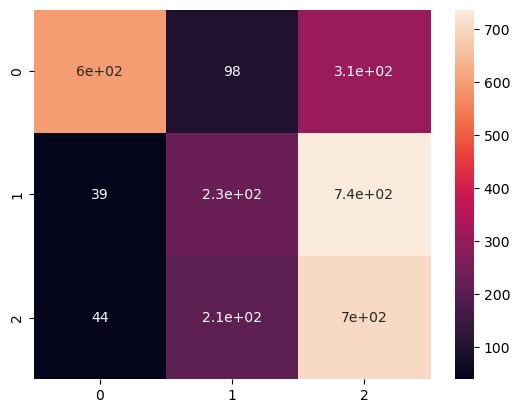

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [37]:
from sklearn import metrics                           
# Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') 
# We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.515736040609137


[Text(0.5, 0.875, 'x[0] <= -0.037\ngini = 0.667\nsamples = 8862\nvalue = [2939, 2937, 2986]'),
 Text(0.25, 0.625, 'x[1] <= -0.317\ngini = 0.636\nsamples = 7227\nvalue = [1376, 2897, 2954]'),
 Text(0.125, 0.375, 'x[0] <= -0.088\ngini = 0.662\nsamples = 2056\nvalue = [567, 741, 748]'),
 Text(0.0625, 0.125, 'gini = 0.64\nsamples = 1612\nvalue = [321, 650, 641]'),
 Text(0.1875, 0.125, 'gini = 0.593\nsamples = 444\nvalue = [246, 91, 107]'),
 Text(0.375, 0.375, 'x[0] <= -0.108\ngini = 0.62\nsamples = 5171\nvalue = [809, 2156, 2206]'),
 Text(0.3125, 0.125, 'gini = 0.65\nsamples = 2289\nvalue = [519, 881, 889]'),
 Text(0.4375, 0.125, 'gini = 0.585\nsamples = 2882\nvalue = [290, 1275, 1317]'),
 Text(0.75, 0.625, 'x[0] <= 2.49\ngini = 0.085\nsamples = 1635\nvalue = [1563, 40, 32]'),
 Text(0.625, 0.375, 'x[0] <= -0.027\ngini = 0.015\nsamples = 1548\nvalue = [1536, 11, 1]'),
 Text(0.5625, 0.125, 'gini = 0.285\nsamples = 71\nvalue = [59, 11, 1]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 1477\nv

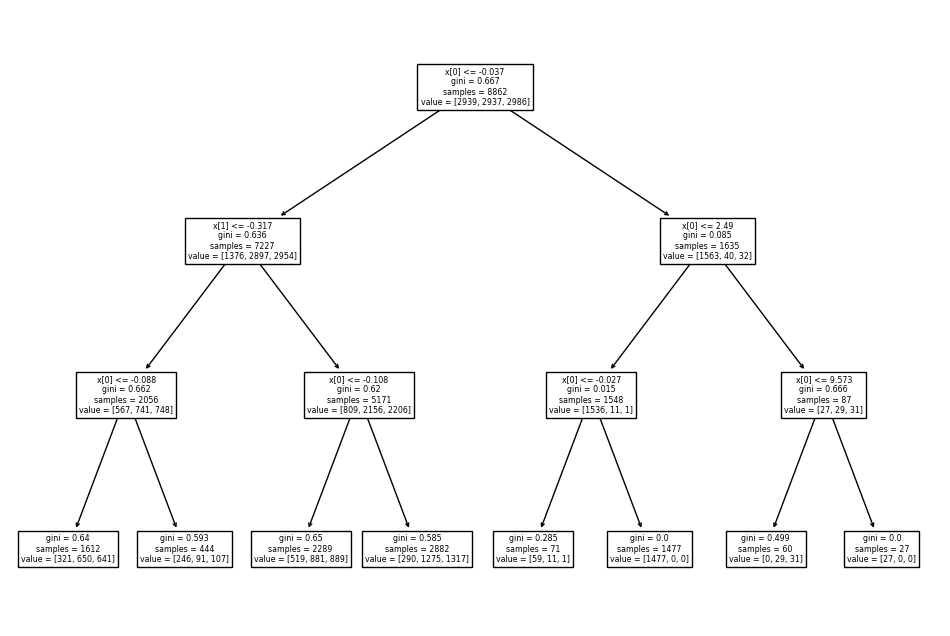

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train)) 

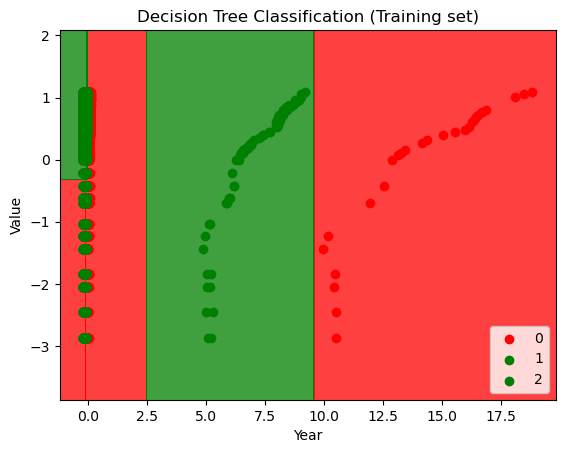

In [39]:
from matplotlib.colors import ListedColormap

# Store the data into X_set and y_set
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [40]:
correlation = df.corr()
print(correlation)

                                    Year     Value   Sex_Encoded  \
Year                        1.000000e+00  0.030236  2.844894e-17   
Value                       3.023616e-02  1.000000 -5.738445e-02   
Sex_Encoded                 2.844894e-17 -0.057384  1.000000e+00   
Single_Year_of_Age_Encoded -5.147363e-16  0.113347  2.273326e-19   

                            Single_Year_of_Age_Encoded  
Year                                     -5.147363e-16  
Value                                     1.133467e-01  
Sex_Encoded                               2.273326e-19  
Single_Year_of_Age_Encoded                1.000000e+00  


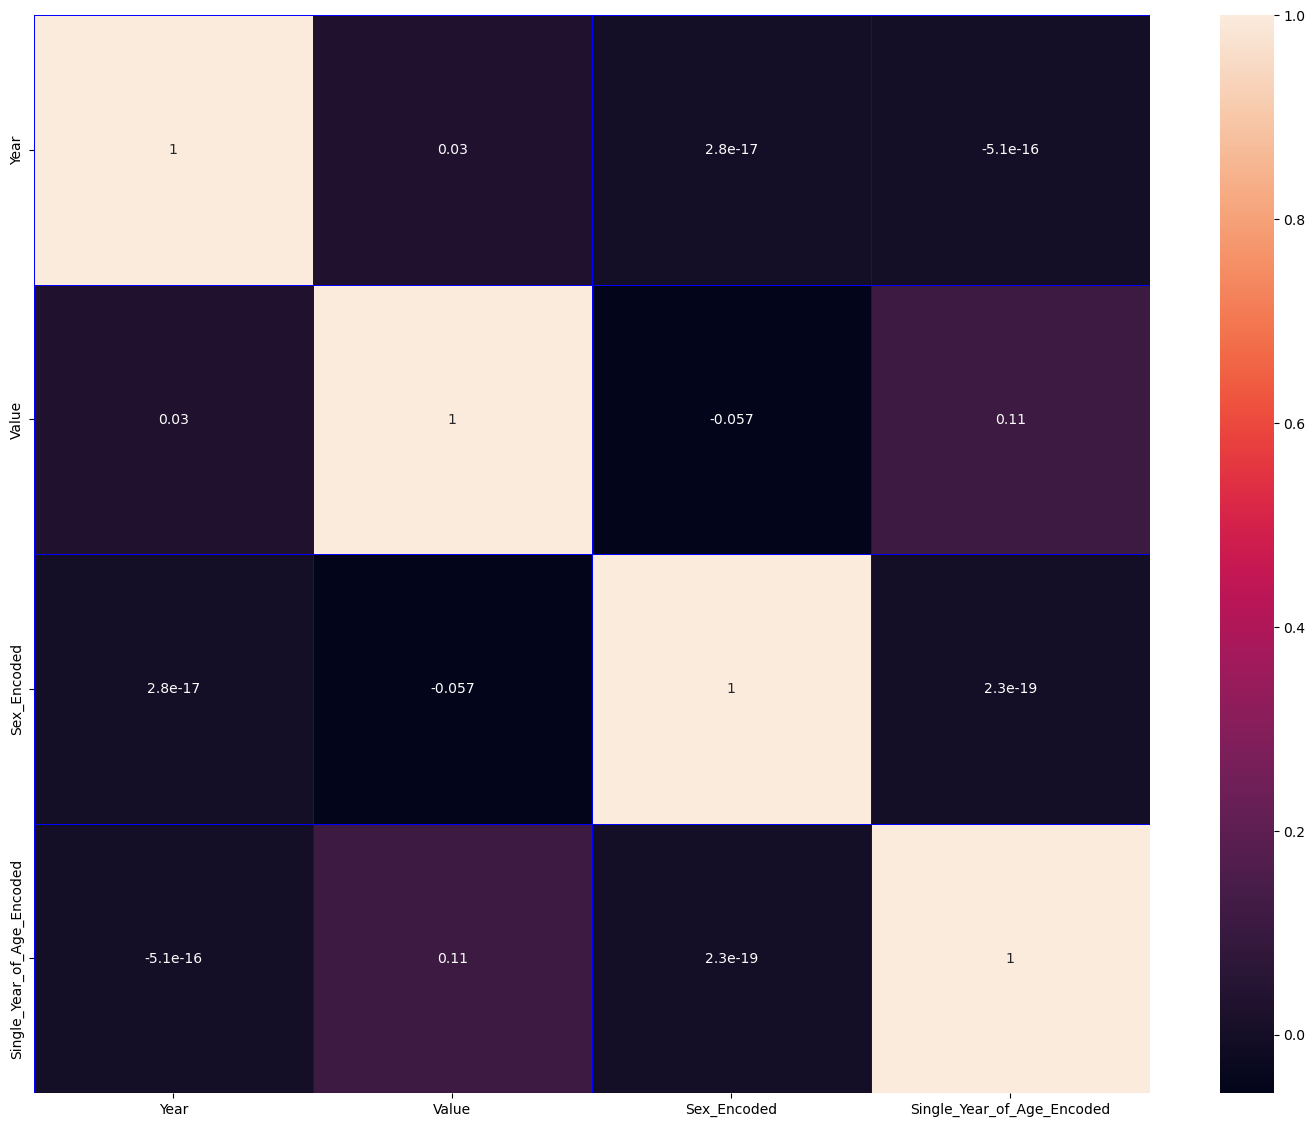

In [41]:
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5);

In [42]:
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [43]:
df_scale.head()

,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
0,-2.878337,10.177272,-1.224745,1.680686
1,-2.878337,5.068168,1.224745,1.680686
2,-2.878337,4.922452,0.000000,1.680686
3,-2.878337,0.006508,-1.224745,1.714986
4,-2.878337,-0.088716,1.224745,1.714986


In [44]:
y = df['Value']
X = df_scale.drop(['Value'],axis=1)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(9453, 3)
(2364, 3)
(9453,)
(2364,)


In [47]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [48]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [49]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.01757943286568764
-----Test set statistics-----
R-squared of the model in test set is: 0.014728465403372692
Root mean squared error of the prediction is: 281360.95495797513
Mean absolute percentage error of the prediction is: 4224.928974858914


## RIDGE

In [50]:
# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, Y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [51]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_ridge) / Y_test)) * 100))

R-squared of the model in training set is: 0.017579432672653827
-----Test set statistics-----
R-squared of the model in test set is: 0.014728723910102937
Root mean squared error of the prediction is: 281360.9180474877
Mean absolute percentage error of the prediction is: 4224.750564064242


## LASSO

In [53]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, Y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [54]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_lasso) / Y_test)) * 100))

R-squared of the model in training set is: 0.01757943282975183
-----Test set statistics-----
R-squared of the model in test set is: 0.014728619077533756
Root mean squared error of the prediction is: 281360.93301584607
Mean absolute percentage error of the prediction is: 4224.912346359173
